In [4]:
IN_COLAB = False

try:
  import google.colab
  IN_COLAB = True
except:
  pass

if IN_COLAB == True:
  from google.colab import drive
  drive.mount('/content/gdrive')
  %cd /content/gdrive/MyDrive/Tesi_GDrive
  PROJECT_PATH = '/content/gdrive/MyDrive/Tesi_GDrive'
  #!ls
else:
  %cd /Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive
  PROJECT_PATH = '/Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive'

import warnings
import pickle
import sys
import os

if IN_COLAB == True:
  sys.path.insert(0, os.path.abspath('functions'))
  sys.path.insert(0, os.path.abspath(''))
else:
  sys.path.insert(0, os.path.abspath('functions'))
  sys.path.insert(0, os.path.abspath(''))

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential, Model
from keras.layers import Dense, Lambda
from keras.layers import Activation
from keras.activations import exponential, relu
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.layers import Input, Layer, InputSpec, Reshape
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
tf.config.run_functions_eagerly(True)
from scipy.optimize import minimize, differential_evolution

from pkl import store_data, load_data
from functions.compressor import compress
from functions.compressor_param import compress_2

import random
from collections import defaultdict

import time



print("Libraries imported")

/Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive
Libraries imported


<Axes: title={'center': 'F_M_FDBK_00 2018'}>

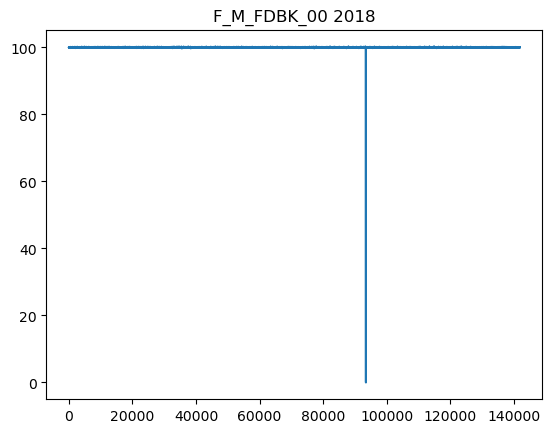

In [5]:
cta30_18_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2018.csv')
CTA30_18 = [cta30_18_path]
# plot values of column 'F_M_FDBK_00' of CTA30_18
df18= pd.read_csv(CTA30_18[0])
#set title
df18['F_M_FDBK_00'].plot(title='F_M_FDBK_00 2018' )
#plot on different picture

#df18['VLV_SUR_FDBK_00'].plot()

#df18['VLV_RAF_FDBK_00'].plot()

<Axes: title={'center': 'F_M_FDBK_00 2019'}>

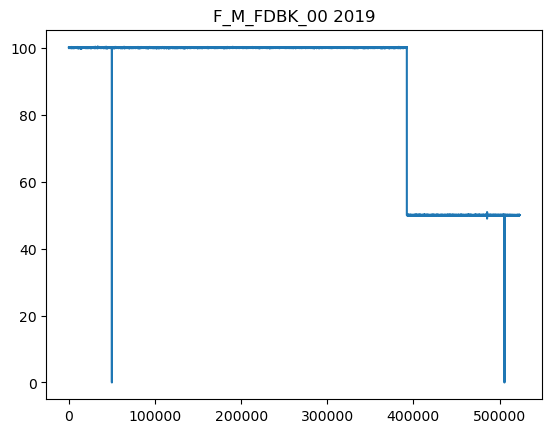

In [6]:
cta30_19_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2019.csv')
CTA30_19 = [cta30_19_path]
# plot values of column 'F_M_FDBK_00' of CTA30_19
df19= pd.read_csv(CTA30_19[0])
df19['F_M_FDBK_00'].plot(title='F_M_FDBK_00 2019')

#df19['VLV_SUR_FDBK_00'].plot()
#df19['VLV_RAF_FDBK_00'].plot()


<Axes: title={'center': 'F_M_FDBK_00 2020'}>

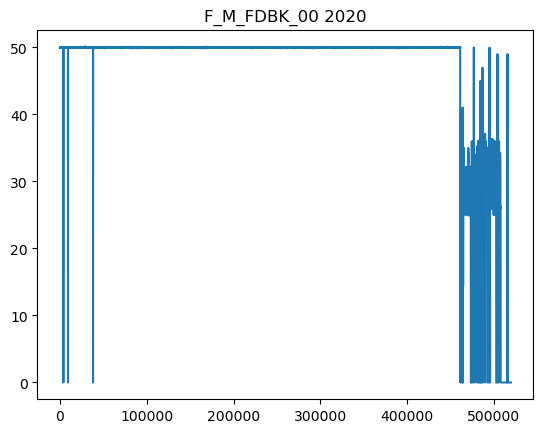

In [7]:
cta30_20_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2020.csv')
CTA30_20 = [cta30_20_path]
# plot values of column 'F_M_FDBK_00' of CTA30_20
df20= pd.read_csv(CTA30_20[0])
df20['F_M_FDBK_00'].plot(title='F_M_FDBK_00 2020')
#df20['VLV_SUR_FDBK_00'].plot()
#df20['VLV_RAF_FDBK_00'].plot()

<Axes: title={'center': 'F_M_FDBK_00 2021'}>

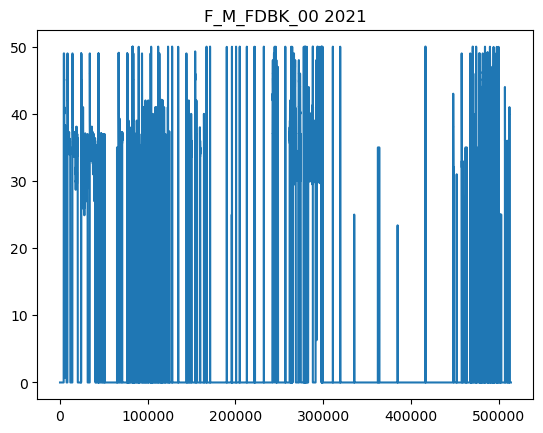

In [8]:
cta30_21_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2021.csv')
CTA30_21 = [cta30_21_path]
# plot values of column 'F_M_FDBK_00' of CTA30_21
df21= pd.read_csv(CTA30_21[0])
df21['F_M_FDBK_00'].plot(title='F_M_FDBK_00 2021')
#df21['VLV_SUR_FDBK_00'].plot()
#df21['VLV_RAF_FDBK_00'].plot()

<Axes: title={'center': 'F_M_FDBK_00 2022'}>

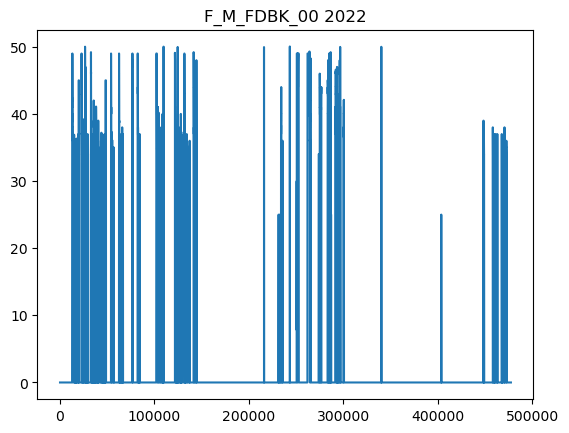

In [9]:
cta30_22_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2022.csv')
CTA30_22 = [cta30_22_path]
# plot values of column 'F_M_FDBK_00' of CTA30_22
df22= pd.read_csv(CTA30_22[0])
df22['F_M_FDBK_00'].plot(title='F_M_FDBK_00 2022')


<Axes: title={'center': 'F_M_FDBK_00 2018-2022'}>

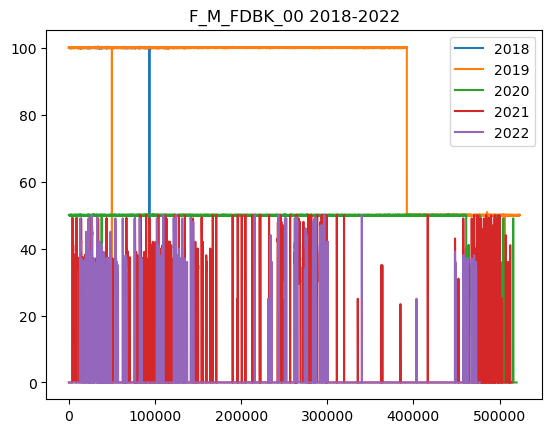

In [10]:
# concatenate all 'F_M_FDBK_00' columns of CTA30_18, CTA30_19, CTA30_20, CTA30_21, CTA30_22 and plot them
df = pd.concat([df18['F_M_FDBK_00'], df19['F_M_FDBK_00'], df20['F_M_FDBK_00'], df21['F_M_FDBK_00'], df22['F_M_FDBK_00']], axis=1)
df.columns = ['2018', '2019', '2020', '2021', '2022'] 
df.plot(title='F_M_FDBK_00 2018-2022')

<Axes: title={'center': 'F_M_FDBK_00 2018-2022'}>

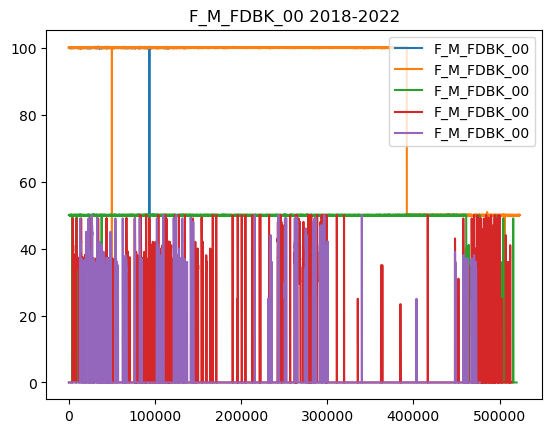

In [11]:
# concatenate all 'F_M_FDBK_00' values and show in a plot the evolution from 2018 to 2022
df = pd.concat([df18['F_M_FDBK_00'], df19['F_M_FDBK_00'], df20['F_M_FDBK_00'], df21['F_M_FDBK_00'], df22['F_M_FDBK_00']], axis=1)
df.plot(title='F_M_FDBK_00 2018-2022')

In [12]:
#remove nan 
df = df.dropna()

<Axes: title={'center': 'F_M_FDBK_00 2018-2022'}>

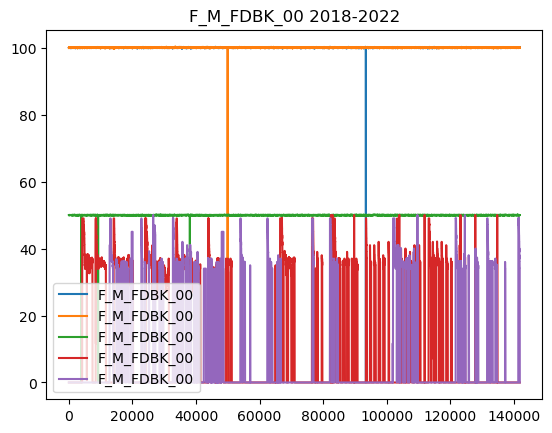

In [13]:
df.plot(title='F_M_FDBK_00 2018-2022')

<Axes: title={'center': 'VLV_SUR_REG_00 2018'}>

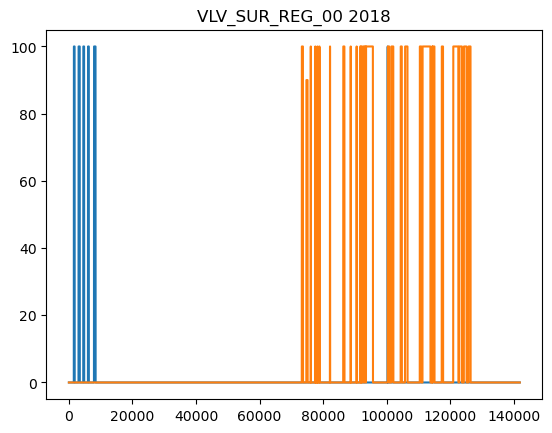

In [15]:
df18['VLV_RAF_REG_00'].plot(title='VLV_RAF_REG_00 2018')
df18['VLV_SUR_REG_00'].plot(title='VLV_SUR_REG_00 2018')



<Axes: title={'center': 'VLV_SUR_REG_00 2019'}>

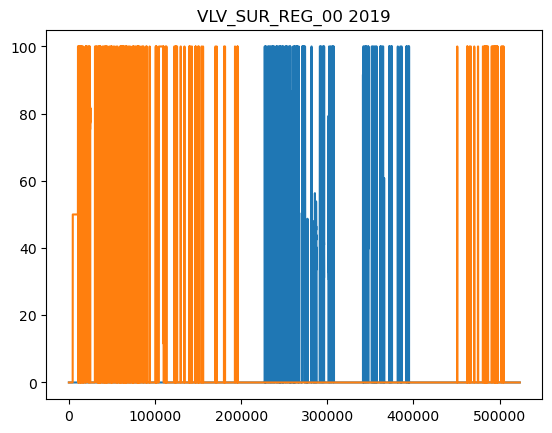

In [16]:
df19['VLV_RAF_REG_00'].plot(title='VLV_RAF_REG_00 2019')
df19['VLV_SUR_REG_00'].plot(title='VLV_SUR_REG_00 2019')

<Axes: title={'center': 'VLV_SUR_REG_00 2020'}>

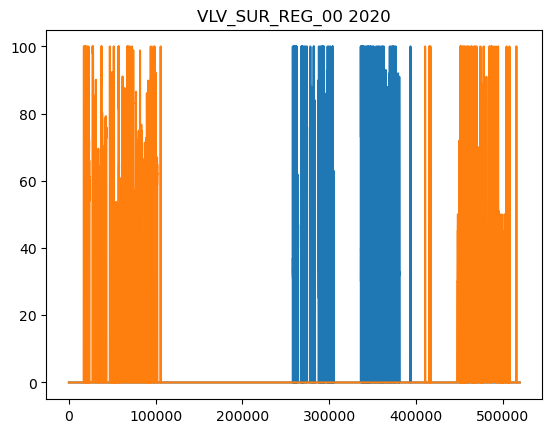

In [17]:
df20['VLV_RAF_REG_00'].plot(title='VLV_RAF_REG_00 2020')
df20['VLV_SUR_REG_00'].plot(title='VLV_SUR_REG_00 2020')

<Axes: title={'center': 'VLV_SUR_REG_00 2021'}>

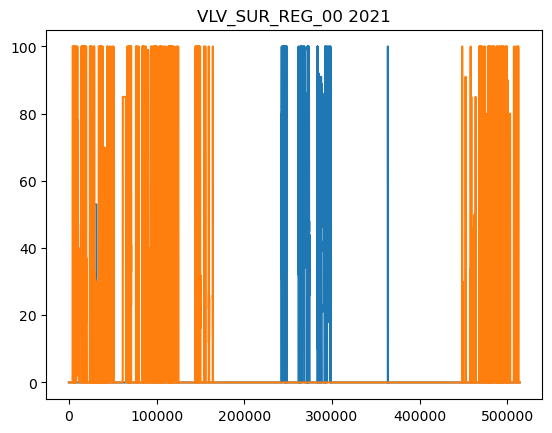

In [18]:
df21['VLV_RAF_REG_00'].plot(title='VLV_RAF_REG_00 2021')
df21['VLV_SUR_REG_00'].plot(title='VLV_SUR_REG_00 2021')

<Axes: title={'center': 'VLV_SUR_REG_00 2022'}>

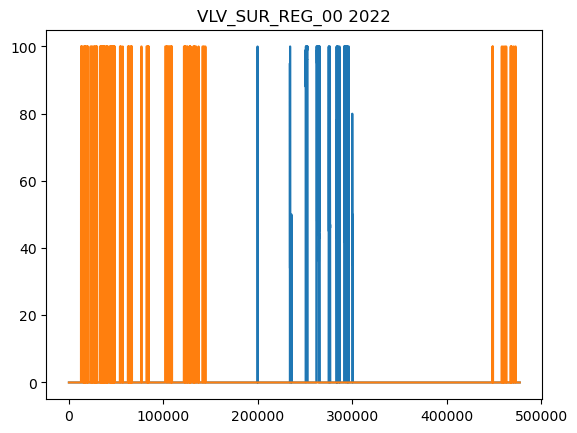

In [19]:
df22['VLV_RAF_REG_00'].plot(title='VLV_RAF_REG_00 2022')
df22['VLV_SUR_REG_00'].plot(title='VLV_SUR_REG_00 2022')

<Axes: title={'center': 'PW_ATT_M_00 2018'}>

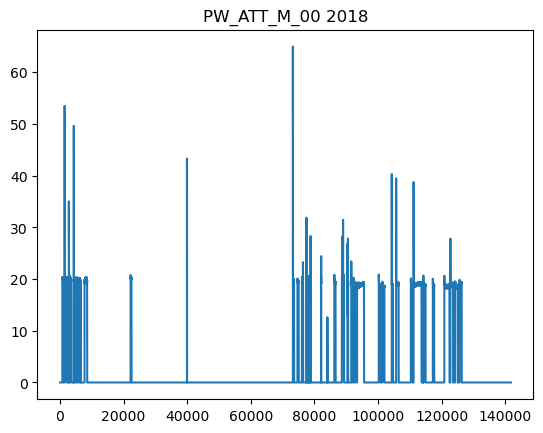

In [20]:
df18['PW_ATT_M_00'].plot(title='PW_ATT_M_00 2018')

<Axes: title={'center': 'PW_ATT_M_00 2019'}>

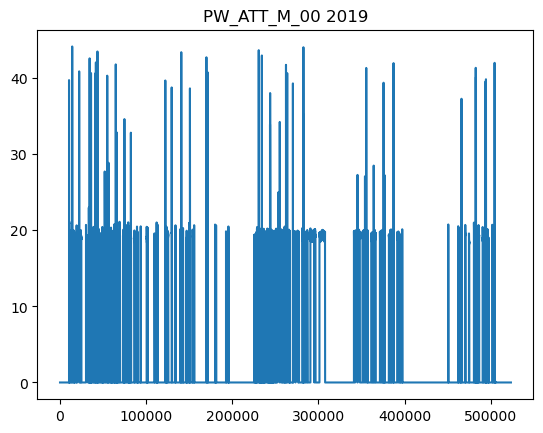

In [21]:
df19['PW_ATT_M_00'].plot(title='PW_ATT_M_00 2019')

<Axes: title={'center': 'PW_ATT_M_00 2020'}>

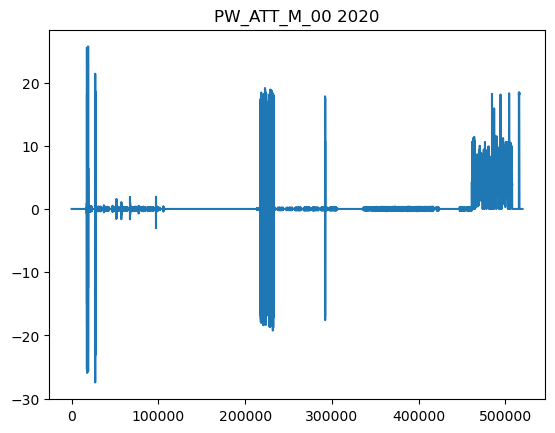

In [22]:
df20['PW_ATT_M_00'].plot(title='PW_ATT_M_00 2020')

<Axes: title={'center': 'PW_ATT_M_00 2021'}>

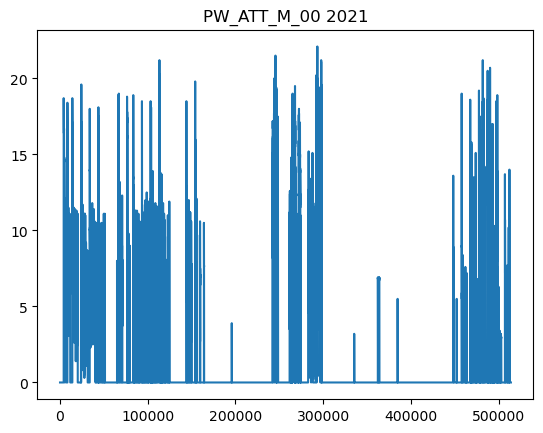

In [23]:
df21['PW_ATT_M_00'].plot(title='PW_ATT_M_00 2021')

<Axes: title={'center': 'PW_ATT_M_00 2022'}>

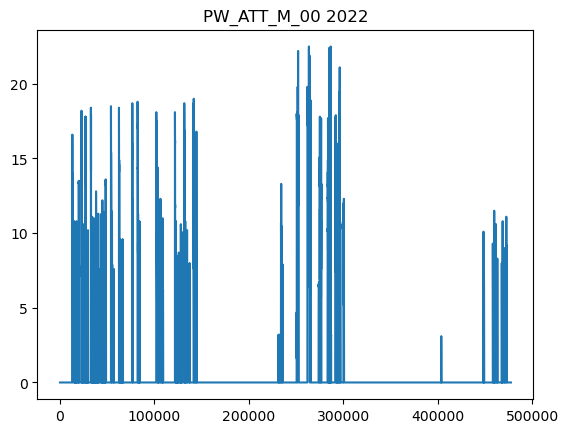

In [24]:
df22['PW_ATT_M_00'].plot(title='PW_ATT_M_00 2022')